<a href="https://colab.research.google.com/github/Jg-Nascimento/trading/blob/master/PrevendoPrecosDeAcoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb

---
> # **Previsão do preço das ações**
usando Python e aprendizado de máquina
---

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
ativo = input("Ativo para análise: ")
df = web.DataReader(ativo, data_source='yahoo', 
                    start='2012-01-01', end='2020-11-23') 
#Show the data 
df

Ativo para análise: tsla


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-11-16,412.450012,404.089996,408.929993,408.089996,26838600.0,408.089996
2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015


In [ ]:
df.shape

(2238, 6)

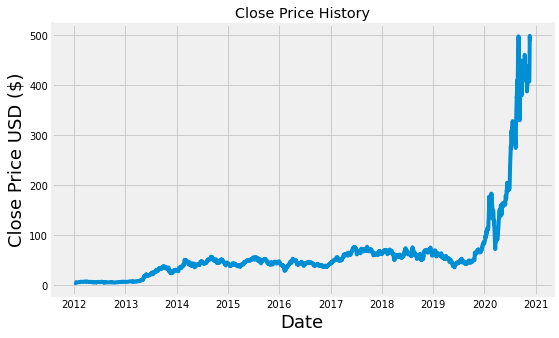

In [ ]:
#Visualizando o histórico do fechamento do preço
plt.figure(figsize=(8,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Criando um novo df apenas com a coluna 'Fechamento'
#Convertendo o df em array numpy
data = df.filter(['Close'])

#calculando o número de linhas para treinar o modelo 
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Dimensione todos os dados para valores entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Cria o conjunto de dados de treinamento escalonado 
#Divide os dados em conjuntos de dados x_train e y_train
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Converte x_train e y_train em array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Remodele os dados na forma aceita pelo LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Construa o modelo de rede LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Trainando o modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

1731/1731 [==============================] - 36s 21ms/step - loss: 1.0194e-04


## Testando o Data set

In [ ]:
#Criando o data sets x_test e y_test 
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []

'''Obtenha todas as linhas do índice 1603 para o resto e todas as 
colunas (neste caso é apenas coluna 'Fechar'), 
então 2003 - 1603 = 400 linhas de dados'''

y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Converter x_test para um array numpy 
x_test = np.array(x_test)

In [ ]:
#Remodele os dados na forma aceita pelo LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Obtendo os modelos de valores de preço previstos
predictions = model.predict(x_test) 

#Desfazer escala
predictions = scaler.inverse_transform(predictions)

In [ ]:
#calcular/Obter o valor do RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

50.48040722453006

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


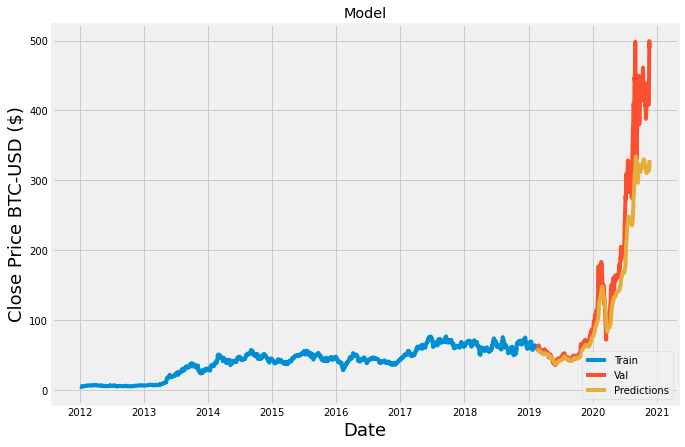

In [ ]:
#plotar/Criar os dados para o gráfico
train = data[:training_data_len]
valid = data[training_data_len:]

#Visualize os detalhes
valid['Predictions'] = predictions
plt.figure(figsize=(10,7))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BTC-USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.style.use('dark_background')
plt.show()

In [ ]:
#Mostre os preços válidos e previstos
valid

,Close,Predictions
Date,,
2019-02-15,61.576000,58.118340
2019-02-19,61.127998,57.979557
2019-02-20,60.512001,57.831688
2019-02-21,58.245998,57.639099
2019-02-22,58.942001,57.237278
...,...,...
2020-11-16,408.089996,315.038055
2020-11-17,441.609985,313.795319
2020-11-18,486.640015,315.213715


## Inserindo os dados no modelo e obter o preço previsto.

In [ ]:
#Cria um novo df
apple_quote = web.DataReader('AAPL', data_source='yahoo',
                             start='2012-01-01', end='2020-11-21')
#preço de fechamento de 60 dias
new_df = apple_quote.filter(['Close'])

#Dimensione os dados para valores entre 0 e 1
last_60_days = new_df[-60:].values

#cria uma lista vazia
last_60_days_scaled = scaler.transform(last_60_days)

#Anexar os últimos 60 dias
X_test = []

#Converta o conjunto de dados X_test em uma matriz numérica
X_test.append(last_60_days_scaled)

#Remodelar os dados
X_test = np.array(X_test)

#Obtenha o preço escalonado previsto
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#desfazer o dimensionamento
pred_price = model.predict(X_test) 
pred_price = scaler.inverse_transform(pred_price)

print('Predição => ', pred_price)

Predição =>  [[106.42962]]


# Agora vamos ver qual foi o preço real para aquele dia.

In [ ]:
apple_quote2 = web.DataReader(ativo, data_source='yahoo', 
                              start='2019-12-18', end='2020-11-21')
print(apple_quote2['Close'])

Date
2019-12-18     78.629997
2019-12-19     80.807999
2019-12-20     81.117996
2019-12-23     83.844002
2019-12-24     85.050003
                 ...    
2020-11-16    408.089996
2020-11-17    441.609985
2020-11-18    486.640015
2020-11-19    499.269989
2020-11-20    489.609985
Name: Close, Length: 235, dtype: float64


In [ ]:
apple_quote['Close'].tail()

Date
2020-11-16    120.300003
2020-11-17    119.389999
2020-11-18    118.029999
2020-11-19    118.639999
2020-11-20    117.339996
Name: Close, dtype: float64